In [1]:
# only for macbook with AMD GPU
import os
import plaidml.keras
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"


In [ ]:
! gdown --id 11zufpuePYayZys7vK-uFyTOG9_g8o7zv

Downloading...
From: https://drive.google.com/uc?id=11zufpuePYayZys7vK-uFyTOG9_g8o7zv
To: /content/all_in_one_MIT_BIH_DATASET_32_5_2021.csv
241MB [00:02, 85.3MB/s]


In [ ]:
!ls


all_in_one_MIT_BIH_DATASET_32_5_2021.csv  sample_data


In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import cv2
import os
from tqdm.notebook import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

In [ ]:
!pwd all_in_one_MIT_BIH_DATASET_32_5_2021.csv

/content


In [3]:
data = pd.read_csv('./MIT_BIH_DATASET_Resampled_Filltered_6_2021.csv')

In [4]:
from sklearn.utils import resample
df_1=data[data['301']==1]
df_2=data[data['301']==2]
df_3=data[data['301']==3]
df_4=data[data['301']==4]
df_0=(data[data['301']==0])

df_4_upsample=resample(df_4,replace=True,n_samples=4200,random_state=42)

new_data=pd.concat([df_0,df_1,df_2,df_3,df_4_upsample])

In [14]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301
0,0.239643,0.164720,0.137425,0.084942,0.153273,0.184037,0.238504,0.157602,0.127725,0.120196,...,0.013269,-0.090593,-0.083783,-0.010214,0.003538,-0.048281,0.013559,-0.054481,-0.037631,0.0
1,-0.019156,0.056494,0.085993,0.016801,-0.018386,-0.057010,-0.068422,0.026895,-0.014682,-0.062788,...,-0.001479,-0.108656,-0.058153,0.001199,-0.007415,0.059003,-0.032712,-0.101004,-0.121043,0.0
2,-0.070916,-0.072735,-0.068566,-0.088535,-0.195064,-0.250222,-0.174585,-0.172860,-0.113858,-0.149651,...,0.060226,0.045062,0.087087,0.094336,0.015158,0.011150,0.037077,0.060055,0.027918,0.0
3,-0.045036,-0.015860,-0.051289,0.046698,0.046348,-0.004921,-0.084028,-0.172101,-0.150082,-0.089753,...,0.006724,0.015977,0.054514,0.133155,0.123297,0.076452,0.054817,-0.004272,-0.099234,0.0
4,0.006723,0.028755,0.040530,-0.042902,-0.081792,-0.152608,-0.105317,-0.062382,-0.040877,-0.144280,...,0.135370,0.078398,0.127388,0.167807,0.151218,0.076355,0.054625,0.005897,0.060152,0.0


In [15]:
new_data.head()

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301
0,0.239643,0.164720,0.137425,0.084942,0.153273,0.184037,0.238504,0.157602,0.127725,0.120196,...,0.013269,-0.090593,-0.083783,-0.010214,0.003538,-0.048281,0.013559,-0.054481,-0.037631,0.0
1,-0.019156,0.056494,0.085993,0.016801,-0.018386,-0.057010,-0.068422,0.026895,-0.014682,-0.062788,...,-0.001479,-0.108656,-0.058153,0.001199,-0.007415,0.059003,-0.032712,-0.101004,-0.121043,0.0
2,-0.070916,-0.072735,-0.068566,-0.088535,-0.195064,-0.250222,-0.174585,-0.172860,-0.113858,-0.149651,...,0.060226,0.045062,0.087087,0.094336,0.015158,0.011150,0.037077,0.060055,0.027918,0.0
3,-0.045036,-0.015860,-0.051289,0.046698,0.046348,-0.004921,-0.084028,-0.172101,-0.150082,-0.089753,...,0.006724,0.015977,0.054514,0.133155,0.123297,0.076452,0.054817,-0.004272,-0.099234,0.0
4,0.006723,0.028755,0.040530,-0.042902,-0.081792,-0.152608,-0.105317,-0.062382,-0.040877,-0.144280,...,0.135370,0.078398,0.127388,0.167807,0.151218,0.076355,0.054625,0.005897,0.060152,0.0


In [ ]:
!pip install biosppy


     |████████████████████████████████| 92kB 5.4MB/s 


In [5]:
from biosppy.signals import ecg

In [6]:
from scipy import signal


In [7]:
new_data['301'].value_counts()

0.0    8408
3.0    6771
1.0    6068
4.0    4200
2.0    3983
Name: 301, dtype: int64

In [8]:
data_new = new_data.to_numpy()
print(data_new.shape)

(29430, 301)


In [9]:

data, labels = data_new[:, :-1], data_new[:, -1]
print(data.shape, labels.shape)



(29430, 300) (29430,)


In [10]:
sampling_rate = float(300)
# filter signal
order = int(0.3 * sampling_rate)
filter_data = np.zeros((len(data),len(data[0])))
for i, (xrow, yrow) in enumerate(zip(data, labels)):
  filtered, _, _ = ecg.st.filter_signal(signal=xrow,
                                      ftype='FIR',
                                      band='bandpass',
                                      order=order,
                                      frequency=[3, 45],
                                      sampling_rate=sampling_rate)
  # print(filtered)
  filter_data[i] = filtered


In [11]:
type(filter_data)

numpy.ndarray

In [12]:
len(filter_data)

29430

***adding Filters***

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(filter_data, labels, test_size=0.40, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.50, random_state=42)

In [14]:
np.unique(y_valid, return_counts=True
          )

(array([0., 1., 2., 3., 4.]), array([1705, 1222,  776, 1361,  822]))

In [15]:
np.unique(y_train, return_counts=True
          )

(array([0., 1., 2., 3., 4.]), array([5055, 3619, 2389, 4066, 2529]))

In [16]:
np.unique(y_test, return_counts=True)


(array([0., 1., 2., 3., 4.]), array([1648, 1227,  818, 1344,  849]))

In [17]:
X_train.shape

(17658, 300)

In [18]:
y_valid.shape

(5886,)

In [19]:
y_test.shape

(5886,)

In [20]:

import keras
import pandas as pd
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras import regularizers

In [23]:
model = None

In [24]:
dropout_perc = 0.2
l2_reg = 0.01
model = Sequential()
model.add(LSTM(300, return_sequences=True,input_shape=(1,300)))
model.add(Dropout(dropout_perc))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(dropout_perc))
model.add(Dense(5, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 300)            721200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 300)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 100)            160400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 64)             6464      
__________

In [ ]:
!pip install livelossplot

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
y_train.shape

(17658,)

In [27]:
y_valid.shape

(5886,)

In [28]:
X_train = np.expand_dims(X_train, axis=1)
X_valid = np.expand_dims(X_valid, axis=1)

In [29]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [30]:
y_train = np.expand_dims(y_train, axis=1)
y_valid = np.expand_dims(y_valid, axis=1)

In [31]:
from livelossplot import PlotLossesKeras
import tensorflow as tf

In [32]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=16,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8)],
    epochs=50)

Train on 17658 samples, validate on 5886 samples
Epoch 1/50
17658/17658 [==============================] - 27s 2ms/step - loss: 0.5625 - acc: 0.8554 - val_loss: 0.2913 - val_acc: 0.9606
Epoch 2/50
17658/17658 [==============================] - 16s 934us/step - loss: 0.2598 - acc: 0.9699 - val_loss: 0.2325 - val_acc: 0.9732
Epoch 3/50
17658/17658 [==============================] - 17s 962us/step - loss: 0.2222 - acc: 0.9775 - val_loss: 0.2116 - val_acc: 0.9769
Epoch 4/50
17658/17658 [==============================] - 18s 1ms/step - loss: 0.1961 - acc: 0.9840 - val_loss: 0.1982 - val_acc: 0.9803
Epoch 5/50
17658/17658 [==============================] - 17s 981us/step - loss: 0.1843 - acc: 0.9858 - val_loss: 0.1989 - val_acc: 0.9791
Epoch 6/50
17658/17658 [==============================] - 17s 962us/step - loss: 0.1748 - acc: 0.9869 - val_loss: 0.1819 - val_acc: 0.9834
Epoch 7/50
17658/17658 [==============================] - 17s 989us/step - loss: 0.1609 - acc: 0.9909 - val_loss: 0.1802 

In [33]:
test_data = np.expand_dims(X_test, axis=1)


In [34]:
test_lables = to_categorical(y_test)
test_lables_dims = np.expand_dims(test_lables, axis=1)


In [35]:
len(test_data)

5886

In [69]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_data, test_lables_dims)
print("test loss, test acc:", results)

Evaluate on test data
5886/5886 [==============================] - 1s 154us/step
test loss, test acc: [0.15083968198364217, 0.9841997961264016]


In [63]:
from sklearn.metrics import accuracy_score


In [80]:

results = model.predict_classes(test_data)

In [85]:
y_test

array([4., 0., 2., ..., 4., 3., 0.])

In [87]:
accuracy_score(y_test,results) 

0.9841997961264016

In [79]:
len(results)

5886

In [68]:
type(test_lables_dims)

numpy.ndarray

In [43]:
valloss = min(history.history['val_loss'])

In [44]:
valloss

0.14706905578578608

In [45]:
minval = (history.history['val_loss']).index(valloss)

Text(0, 0.5, 'loss')

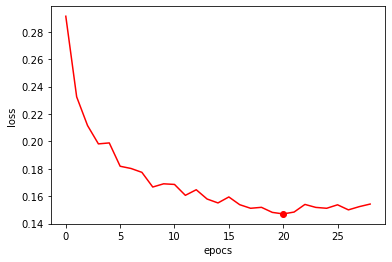

In [48]:
plt.plot(history.history['val_loss'],markevery=[minval],marker='o', color='r')
plt.xlabel("epocs")
plt.ylabel("loss")

In [51]:
history.history['val_acc']

[0.9605844376486579,
 0.9731566428814136,
 0.9768943255181787,
 0.9802922188243289,
 0.9791029561671764,
 0.9833503227998641,
 0.9825008494733265,
 0.9838600067957866,
 0.9858987427794768,
 0.9843696907917091,
 0.9845395854570167,
 0.9852191641182467,
 0.9836901121304791,
 0.9853890587835542,
 0.9855589534488617,
 0.9850492694529391,
 0.9850492694529391,
 0.9862385321100917,
 0.9852191641182467,
 0.9858987427794768,
 0.9869181107713217,
 0.9855589534488617,
 0.9847094801223242,
 0.9843696907917091,
 0.9862385321100917,
 0.9853890587835542,
 0.9858987427794768,
 0.9852191641182467,
 0.9843696907917091]

Text(0, 0.5, 'accuracy')

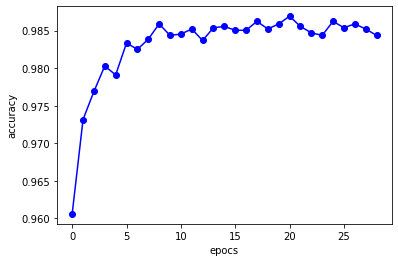

In [53]:
plt.plot(history.history['val_acc'],marker='o', color='b')
plt.xlabel("epocs")
plt.ylabel("accuracy")

In [ ]:
model.save('LSTM_50_E_balanceddata_FILTER.h5')

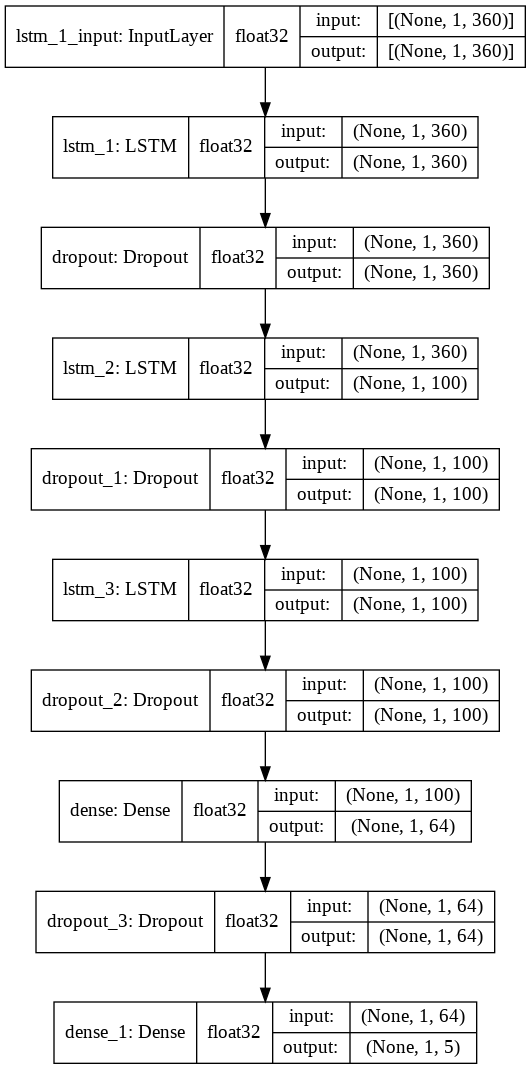

In [ ]:
plot_model(model, to_file='model_plot.png', rankdir='TB',show_dtype=True,show_shapes=True, show_layer_names=True)